# Outlier removal

### Support Functions

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# For make_features_labels
from tools.feature_format import featureFormat, targetFeatureSplit

def feature_label_plotter(tup_list, rows_columns=(1,1), figsize=(7, 7)):
    """
    Takes a list of tuples with a (2-dimensional array, its labels, plot title) and plots each
    """
    r = rows_columns[0]
    c = rows_columns[1]
    plt.close('all')
    fig = plt.figure(figsize=figsize, tight_layout=True)
    for i, tup in enumerate(tup_list):
        poi_mask = tup[1] == 1
        non_poi_mask = tup[1] == 0
        X = tup[0][:,0]
        y = tup[0][:,1]
        ax = fig.add_subplot(r, c, i+1)
        ax.scatter(X[poi_mask], y[poi_mask], 
                   facecolors='none', edgecolors='b', label='poi')
        ax.scatter(X[non_poi_mask], y[non_poi_mask], 
                   facecolors='none', edgecolors='r', s=5, label='non_poi')
#         ax.set_xlabel('')
#         ax.set_ylabel('')
        try:
            title = tup[2]
        except IndexError:
            title = ''
        ax.set_title(title)
        ax.legend()
    plt.show()

def make_features_labels(dataset, feature_names, remove_nan=False):
    """
    Quick way to split a dataset into features and labels based on feature names
    """
    data = featureFormat(dataset, feature_names, 
                         sort_keys=True, remove_NaN=remove_nan)
    labels, features = targetFeatureSplit(data)
    labels = np.array(labels)
    features = np.array(features)
    
    return features, labels

### Get necessary data from [imputing_data](imputing_data.ipynb)

In [1]:
import pickle
with open('imputer_dict.pkl', 'rb') as f:
    imputer_dict = pickle.load(f)

### Compress data down to 2 principal components to visualize the differences between the three imputing approaches

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
tup_list = []
for key in imputer_dict.keys():
    if key != 'original':
        arr = pca.fit_transform(imputer_dict[key][0])
        labels = imputer_dict[key][1]
        title = key
        tup_list.append((arr, labels, title))

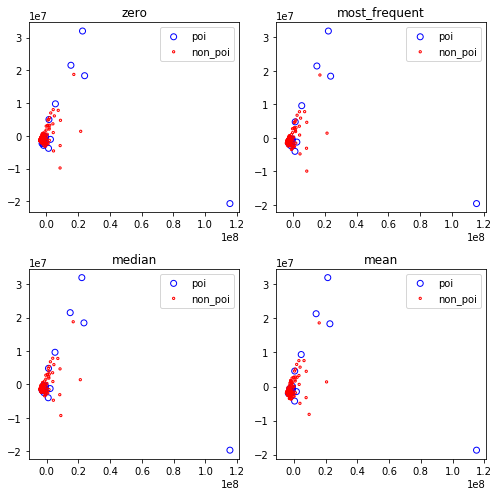

In [19]:
feature_label_plotter(tup_list, rows_columns=(2,2), figsize=(7,7))